# Data exploration and cleaning

Imagine you work at BlueBikes, the bike sharing company in charge of the blue bikes in and around Boston. You're developing an app and one of the functions is to estimate the travel time between two stations. How would you go about solving this problem?

Data from [BlueBikes](https://www.bluebikes.com/system-data). We will look at the most recent trip histories (02/20220) [here](https://s3.amazonaws.com/hubway-data/202202-bluebikes-tripdata.zip).

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import haversine_distances
from math import radians

earth_radius = 6371.0

pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path_to_file = '/content/drive/MyDrive/BA885-2022/Week 2/BlueBikes/202202-bluebikes-tripdata.csv'
trip_histories = pd.read_csv(path_to_file)

trip_histories.shape

(110460, 14)

In [4]:
trip_histories

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
0,457,2022-02-01 00:01:22.5160,2022-02-01 00:09:00.2370,380,Mass Ave at Albany St,42.361358,-71.096703,116,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412,6720,Subscriber,02139
1,596,2022-02-01 00:01:39.3630,2022-02-01 00:11:35.5800,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,544,Old Morse Park at Putnam Ave,42.357662,-71.108413,5148,Subscriber,02139
2,927,2022-02-01 00:02:41.5460,2022-02-01 00:18:08.8330,192,Purchase St at Pearl St,42.354659,-71.053181,327,Main St at Thompson Sq,42.374878,-71.063835,5780,Subscriber,02129
3,1541,2022-02-01 00:02:53.7400,2022-02-01 00:28:35.2070,380,Mass Ave at Albany St,42.361358,-71.096703,73,Harvard Square at Brattle St / Eliot St,42.373329,-71.120986,5957,Subscriber,02139
4,1165,2022-02-01 00:03:14.9160,2022-02-01 00:22:40.2040,55,Boylston St at Massachusetts Ave,42.347406,-71.086784,331,Huntington Ave at Mass Art,42.336586,-71.098870,2870,Subscriber,02215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110455,351,2022-02-28 23:59:14.2560,2022-03-01 00:05:06.0610,378,191 Beacon St,42.380323,-71.108786,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,6620,Subscriber,02116
110456,220,2022-02-28 23:59:18.3290,2022-03-01 00:02:58.7550,177,University Park,42.362648,-71.100061,107,Ames St at Main St,42.362500,-71.088220,5718,Subscriber,02139
110457,281,2022-02-28 23:59:18.7310,2022-03-01 00:04:00.6370,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,179,MIT Vassar St,42.355601,-71.103945,2768,Subscriber,02139
110458,225,2022-02-28 23:59:30.7720,2022-03-01 00:03:16.3230,190,Nashua Street at Red Auerbach Way,42.365673,-71.064263,549,Valenti Way at Haverhill St,42.364739,-71.059349,3645,Subscriber,02114


## Explore the data

First we have to understand what the data represents: what are the features or columns, what range of values to the features take. 

Next we have to check if there are missing value, duplicates, contradictory data and finally outliers.

In [5]:
trip_histories.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code'],
      dtype='object')

In [6]:
trip_histories.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid
count,1.104600e+05,110460.000000,110460.000000,110460.000000,110460.000000,110460.000000,110460.000000,110460.000000
mean,1.104414e+03,197.280663,42.359398,-71.094100,195.135750,42.359309,-71.093542,4895.881912
std,1.076689e+04,163.036025,0.016449,0.024339,162.995789,0.016460,0.024411,1613.734469
min,6.100000e+01,3.000000,42.255600,-71.247759,1.000000,42.255600,-71.247759,218.000000
25%,3.800000e+02,68.000000,42.349426,-71.108687,67.000000,42.349244,-71.108413,3485.000000
50%,6.010000e+02,131.000000,42.360793,-71.095315,118.000000,42.360793,-71.095171,5030.000000
75%,9.970000e+02,360.000000,42.368844,-71.079468,360.000000,42.368605,-71.077828,6237.000000
max,1.445015e+06,558.000000,42.523452,-70.889524,558.000000,42.523452,-70.889524,7653.000000


In [7]:
trip_histories.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
postal code                 object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f401b1e97d0>,
      dtype=object)

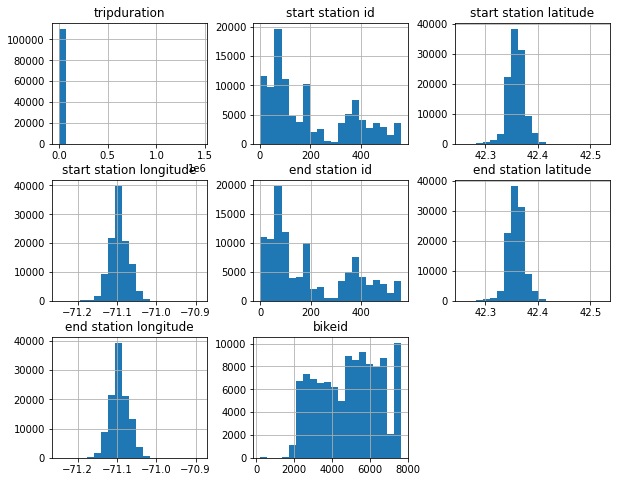

In [8]:
trip_histories.hist(bins=20, figsize=(10,8))

In [9]:
binned_duration = pd.cut(trip_histories['tripduration'], bins=[300*i for i in range(15)])

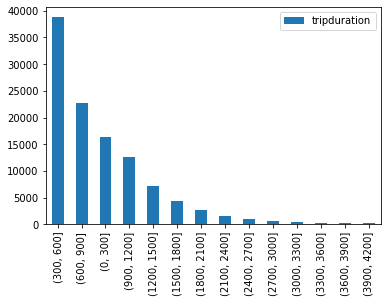

In [10]:
pd.DataFrame(binned_duration.value_counts()).plot(kind='bar')

In [11]:
trip_histories['start station name'].unique().shape

(355,)

In [12]:
trip_histories['end station name'].unique().shape

(355,)

## Data Cleaning and Preprocessing

- Remove entries with too many missing values
- Remove duplicates
- Remove samples that are not relevant to the problem
- Remove irrelevant features
- Engineer better features
- Assign numerical value to all features
- Normalize the numerical values ~ mean=0 and std=1

In [13]:
# Check for missing data
trip_histories.isna().sum()

tripduration                  0
starttime                     0
stoptime                      0
start station id              0
start station name            0
start station latitude        0
start station longitude       0
end station id                0
end station name              0
end station latitude          0
end station longitude         0
bikeid                        0
usertype                      0
postal code                5090
dtype: int64

In [14]:
# Check for duplicates
trip_histories.duplicated().sum()

0

It's rare to catch duplicates so easily! Most often duplicates will have missing data or are recorded in a different format. Features that take float values are often the best features to focus on when looking for duplicates.

In [15]:
trip_histories['starttime'].unique().shape

(110450,)

In [16]:
trip_histories['stoptime'].unique().shape

(110457,)

In [17]:
trip_histories[['starttime', 'stoptime']].duplicated().sum()

0

We are interested in trip durations from A to B (A != B), thus roundtrips need to be removed.

In [18]:
mask_rt = (trip_histories['start station id'] == trip_histories['end station id'])
mask_rt.sum()

3673

In [19]:
trip_histories.shape

(110460, 14)

In [20]:
trip_histories = trip_histories.drop(trip_histories[mask_rt].index)
trip_histories.shape

(106787, 14)

### Trips that are not simple commutes

In [21]:
trip_histories['distance'] = trip_histories.apply(lambda row: 
                                                  haversine_distances(
                                                      [[radians(row['start station latitude']), 
                                                       radians(row['start station longitude'])],
                                                      [radians(row['end station latitude']),
                                                       radians(row['end station longitude'])]])[1,0]*earth_radius,
                                                  axis=1)

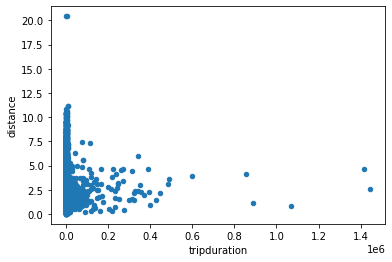

In [22]:
trip_histories[['tripduration', 'distance']].plot(kind='scatter', x='tripduration', y='distance')

In [23]:
mask_ld = trip_histories['tripduration'] > 10000
mask_ld.sum()

244

In [24]:
mask_ld = trip_histories['tripduration'] > 10000
trip_histories = trip_histories.drop(trip_histories[mask_ld].index)
trip_histories.shape

(106543, 15)

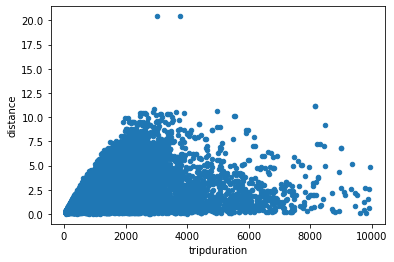

In [25]:
trip_histories[['tripduration', 'distance']].plot(kind='scatter', x='tripduration', y='distance')

In [26]:
trip_histories['binned duration'] = pd.cut(trip_histories['tripduration'], bins=[300*i for i in range(34)])

In [27]:
trip_histories['binned duration'][0] == pd.Interval(300,600,closed='right')

True

In [28]:
duration_bins = {i: pd.Interval(i*300, (i+1)*300, closed='right') for i in range(34)}
duration_bins_r = {y: x for x, y in duration_bins.items()}

In [29]:
trip_histories['binned duration'] = trip_histories['binned duration'].map(duration_bins_r)

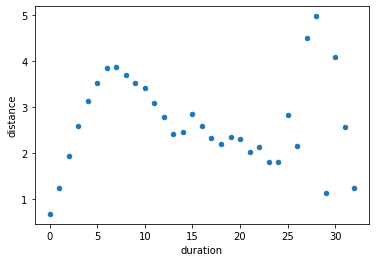

In [30]:
pd.DataFrame(
    [[i, trip_histories[trip_histories['binned duration'] == i]['distance'].mean()] for i in range(34)],
    columns = ['duration', 'distance']
).plot(kind='scatter', x='duration', y='distance')

In [31]:
(trip_histories['binned duration'] < 7).sum()

102162

This looks like something we can work with. Note that in our units, duration > 7 translates over 35 minutes. It is reasonable to assume that the data beyond this point is skewed and a significant number of such trips are not commutes. If we limit only use trips that took less that 35' a simple linear regression can estimate travel time pretty well.

In [32]:
trip_histories = trip_histories[trip_histories['binned duration'] < 7]

### Irrelevant features

In [33]:
trip_histories.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code', 'distance', 'binned duration'],
      dtype='object')

In [34]:
trip_histories[['start station id', 'start station latitude', 'start station longitude']].duplicated()

0         False
1         False
2         False
3          True
4         False
          ...  
110455     True
110456     True
110457     True
110458     True
110459     True
Length: 102162, dtype: bool

In [36]:
trip_histories = trip_histories.drop(labels = ['stoptime',
                                               'start station id',
                                               'start station name',
                                               'end station id',
                                               'end station name',
                                               'bikeid',
                                               'usertype',
                                               'postal code'], axis=1)

In [37]:
trip_histories

,tripduration,starttime,start station latitude,start station longitude,end station latitude,end station longitude,distance,binned duration
0,457,2022-02-01 00:01:22.5160,42.361358,-71.096703,42.370803,-71.104412,1.226403,1
1,596,2022-02-01 00:01:39.3630,42.365070,-71.103100,42.357662,-71.108413,0.932218,1
2,927,2022-02-01 00:02:41.5460,42.354659,-71.053181,42.374878,-71.063835,2.412683,3
3,1541,2022-02-01 00:02:53.7400,42.361358,-71.096703,42.373329,-71.120986,2.398272,5
4,1165,2022-02-01 00:03:14.9160,42.347406,-71.086784,42.336586,-71.098870,1.560245,3
...,...,...,...,...,...,...,...,...
110455,351,2022-02-28 23:59:14.2560,42.380323,-71.108786,42.373268,-71.118579,1.123634,1
110456,220,2022-02-28 23:59:18.3290,42.362648,-71.100061,42.362500,-71.088220,0.973008,0
110457,281,2022-02-28 23:59:18.7310,42.358100,-71.093198,42.355601,-71.103945,0.925733,0
110458,225,2022-02-28 23:59:30.7720,42.365673,-71.064263,42.364739,-71.059349,0.416867,0


In [38]:
for feature in ['start station latitude', 'start station longitude', 'end station latitude', 'end station longitude']:
    trip_histories[feature] = trip_histories.apply(lambda row: radians(row[feature]), axis=1)

In [39]:
trip_histories

,tripduration,starttime,start station latitude,start station longitude,end station latitude,end station longitude,distance,binned duration
0,457,2022-02-01 00:01:22.5160,0.739345,-1.240872,0.739510,-1.241006,1.226403,1
1,596,2022-02-01 00:01:39.3630,0.739410,-1.240983,0.739281,-1.241076,0.932218,1
2,927,2022-02-01 00:02:41.5460,0.739228,-1.240112,0.739581,-1.240298,2.412683,3
3,1541,2022-02-01 00:02:53.7400,0.739345,-1.240872,0.739554,-1.241295,2.398272,5
4,1165,2022-02-01 00:03:14.9160,0.739102,-1.240698,0.738913,-1.240909,1.560245,3
...,...,...,...,...,...,...,...,...
110455,351,2022-02-28 23:59:14.2560,0.739676,-1.241082,0.739553,-1.241253,1.123634,1
110456,220,2022-02-28 23:59:18.3290,0.739368,-1.240930,0.739365,-1.240723,0.973008,0
110457,281,2022-02-28 23:59:18.7310,0.739288,-1.240810,0.739245,-1.240998,0.925733,0
110458,225,2022-02-28 23:59:30.7720,0.739420,-1.240305,0.739404,-1.240220,0.416867,0


In [40]:
trip_histories['starttime'] = pd.to_datetime(trip_histories['starttime']).dt.time

In [41]:
trip_histories

,tripduration,starttime,start station latitude,start station longitude,end station latitude,end station longitude,distance,binned duration
0,457,00:01:22.516000,0.739345,-1.240872,0.739510,-1.241006,1.226403,1
1,596,00:01:39.363000,0.739410,-1.240983,0.739281,-1.241076,0.932218,1
2,927,00:02:41.546000,0.739228,-1.240112,0.739581,-1.240298,2.412683,3
3,1541,00:02:53.740000,0.739345,-1.240872,0.739554,-1.241295,2.398272,5
4,1165,00:03:14.916000,0.739102,-1.240698,0.738913,-1.240909,1.560245,3
...,...,...,...,...,...,...,...,...
110455,351,23:59:14.256000,0.739676,-1.241082,0.739553,-1.241253,1.123634,1
110456,220,23:59:18.329000,0.739368,-1.240930,0.739365,-1.240723,0.973008,0
110457,281,23:59:18.731000,0.739288,-1.240810,0.739245,-1.240998,0.925733,0
110458,225,23:59:30.772000,0.739420,-1.240305,0.739404,-1.240220,0.416867,0


In [42]:
trip_histories['starttime'] = trip_histories.apply(lambda row: int(str(row['starttime'])[0:2]), axis=1)

In [43]:
trip_histories

,tripduration,starttime,start station latitude,start station longitude,end station latitude,end station longitude,distance,binned duration
0,457,0,0.739345,-1.240872,0.739510,-1.241006,1.226403,1
1,596,0,0.739410,-1.240983,0.739281,-1.241076,0.932218,1
2,927,0,0.739228,-1.240112,0.739581,-1.240298,2.412683,3
3,1541,0,0.739345,-1.240872,0.739554,-1.241295,2.398272,5
4,1165,0,0.739102,-1.240698,0.738913,-1.240909,1.560245,3
...,...,...,...,...,...,...,...,...
110455,351,23,0.739676,-1.241082,0.739553,-1.241253,1.123634,1
110456,220,23,0.739368,-1.240930,0.739365,-1.240723,0.973008,0
110457,281,23,0.739288,-1.240810,0.739245,-1.240998,0.925733,0
110458,225,23,0.739420,-1.240305,0.739404,-1.240220,0.416867,0
